# Data Processing

The purpose of this notebook is to process the data and keep it separate from the main analysis and visualization. We will write the code unnecessary for the user to interact with such as functions, import libraries, and processing the data into sheets of data we can interpret.

## Table of Contents
* content

## Notebooks
* [Overview Notebook](airpollution.ipynb)
* [Processing Notebook](dataprocessing.ipynb)
* [Analysis Notebook](data-analysis.ipynb)

## Import Libraries

Here are the libraries we are going to use to graph and analyze our data.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from glob import glob
from matplotlib.pyplot import figure 
import datetime
import geopandas
from datetime import datetime
from datetime import timedelta

## Functions

Here are the functions we have created to analyze the datasets we are looking at and graph them to display trends and comparisons.

In [7]:
def concatinate_six(path):
    files = glob(path + '*csv')
    dfs = []
    for f in files:
        df = pd.read_csv(f)
        df['source_file'] = f.split('/')[-1]
        dfs.append(df)
    
    data = pd.concat(dfs)
    data.columns = ['date', 'source_ozone_aqi', 'ozone_aqi',
                    'source_pm25_aqi', 'pm25_aqi', 'file']
    
    data['date'] = pd.to_datetime(data['date'])
    data = data.sort_values('date').reset_index(drop=True) # sort *after* converting to datetime
    return data

def concatinate_seven(path):
    files = glob(path + '*csv')
    dfs = []
    for f in files:
        df = pd.read_csv(f)
        df['source_file'] = f.split('/')[-1]
        dfs.append(df)
    
    data = pd.concat(dfs)
    data.columns = ['date', 'source_ozone_aqi', 'ozone_aqi',
                    'source_pm25_aqi', 'pm25_aqi', 'file', '']
    
    data['date'] = pd.to_datetime(data['date'])
    data = data.sort_values('date').reset_index(drop=True) # sort *after* converting to datetime
    return data

def concatinate_eight(path):
    files = glob(path + '*csv')
    dfs = []
    for f in files:
        df = pd.read_csv(f)
        df['source_file'] = f.split('/')[-1]
        dfs.append(df)
    
    data = pd.concat(dfs)
    data.columns = ['date', 'source_ozone_aqi', 'ozone_aqi',
                    'source_pm25_aqi', 'pm25_aqi', 'file', '', '']
    
    data['date'] = pd.to_datetime(data['date'])
    data = data.sort_values('date').reset_index(drop=True) # sort *after* converting to datetime
    return data

def concatinate_nine(path):
    files = glob(path + '*csv')
    dfs = []
    for f in files:
        df = pd.read_csv(f)
        df['source_file'] = f.split('/')[-1]
        dfs.append(df)
    
    data = pd.concat(dfs)
    data.columns = ['date', 'source_ozone_aqi', 'ozone_aqi',
                    'source_pm25_aqi', 'pm25_aqi', 'file', '', '', '']
    
    data['date'] = pd.to_datetime(data['date'])
    data = data.sort_values('date').reset_index(drop=True) # sort *after* converting to datetime
    return data

def rolling_mean(df, series_name, z = 30):
    s = df[['date', series_name]].dropna()
    col = '{}_smoothed'.format(series_name)
    s[col] = s[series_name].rolling(window=z).mean()
    return df.merge(s[['date', col]], how='left')
    return data

def missing_time_analysis(df, series_name):
    print('\nAnalyzing missing time series data for "{}"'.format(series_name))
    s = df[['date', series_name]].dropna()
    s['delta_t'] = s['date'].diff()
    s['delta_days'] = s['delta_t'].apply(lambda t: t.days)
    display(s.head(5))
    s.delta_days.hist(bins=50)
    plt.title('Time Gaps (days)')
    plt.show()
    display(s['delta_days'].describe())
    display(s[s.delta_days > 5]) # show any gaps larger than 5 days
    display(s[s['delta_days'] > 5].groupby('delta_days').size())
        

def aqi_plot(x, y): 
    
    ax = x.plot.line(
    'date', ['ozone_aqi_smoothed', 'pm25_aqi_smoothed'],
    figsize=(16, 10), colormap='Paired',
    label=['Ozone', 'PM 2.5'])
    
    ax.set_title(y + ' Air Quality Trend', fontsize=18)
    ax.set_xlabel('Time (1985-2020)', fontsize=14)
    ax.set_ylabel('Average AQI', fontsize=14)
    ax.legend(prop={'size': 14})
    ax.grid()

def year_plot(x, y):
    data = x
    data['ozone_aqi'] = x['Ozone_AQI_Value'].rolling(window=30).mean()
    data['pm25_aqi'] = x['PM2.5_AQI_Value'].rolling(window=30).mean()
    
    ax = data.plot.line('Date', ['ozone_aqi', 'pm25_aqi'], figsize = (16, 10), colormap = 'Paired',
                     label = ['Ozone', 'PM 2.5'])
    ax.set_title(y + 'Air Quality Trend', fontsize = 18)
    ax.set_xlabel('Time (2020)', fontsize = 14)
    ax.set_ylabel('AQI', fontsize = 14)
    ax.legend(prop = {'size' : 14})
    ax.grid()
    
def plot_all(x):
    

    data = x[0]
    
   
    for f in range (1, len(x)):
        data = pd.merge(data, x[f], how = 'inner', on = 'date')
    ax = data.plot.line('date', ['ozone_aqi_smoothed_x', 
                                 'ozone_aqi_smoothed_y', 'ozone_aqi_smoothed'], figsize = (20, 10), title = 'Ozone Quality Trend', colormap = 'Paired')
    ax.set_xlabel('Time (1985-2020)')
    ax.set_ylabel('Average AQI')
    ax.legend(['NY-NJ-PA', 'TX', 'MA-NH', 'CA', 'PA-NJ-DE-MD', 'WA', 'MN-WI', 'IL-IN-WI', 'GA', 
              'MI', 'FL', 'AZ', 'DC-VA-MD-WV', 'CO', 'MO-IL'])
    ax.grid(True)
    
    bx = data.plot.line('date', ['pm25_aqi_smoothed_x',
                                 'pm25_aqi_smoothed_y', 'pm25_aqi_smoothed'], figsize = (20, 10), title = 'Particulate Matter Quality Trend', colormap = 'Paired')
    bx.set_xlabel('Time (1985-2020)')
    bx.set_ylabel('Average AQI')
    bx.legend(['NY-NJ-PA', 'TX', 'MA-NH', 'CA', 'PA-NJ-DE-MD', 'WA', 'MN-WI', 'IL-IN-WI', 'GA', 
              'MI', 'FL', 'AZ', 'DC-VA-MD-WV', 'CO', 'MO-IL'])
    bx.grid(True)

def production(x, z):

    y = x
    goods = ['Gasoline', 'Fuel oils', 'Coal n.e.c', 'Motorized vehicles', 'Transport equipment', 'Machinery'
                   , 'Chemical products', 'Newsprint/paper', 'Printed products']

    y = y.sort_values(by = ['ID SCTG2', 'Year'], ascending = True)

    gasoline_index = [y.loc[y['SCTG2'] == 'Gasoline'].index.values.tolist()]
    gasoline = []
    for i in range (5):
        gasoline.append(x.iat[gasoline_index[0][i], 4])
    
    fuel_oils_index = [y.loc[y['SCTG2'] == 'Fuel oils'].index.values.tolist()]
    fuel_oils = []
    for i in range (5):
        fuel_oils.append(x.iat[fuel_oils_index[0][i], 4])
        
    coal_nec_index = [y.loc[y['SCTG2'] == 'Coal-n.e.c.'].index.values.tolist()]
    coal_nec = []
    for i in range (5):
        coal_nec.append(x.iat[coal_nec_index[0][i], 4])

    motorized_vehicles_index = [y.loc[y['SCTG2'] == 'Motorized vehicles'].index.values.tolist()]
    motorized_vehicles = []
    for i in range (5):
        motorized_vehicles.append(x.iat[motorized_vehicles_index[0][i], 4])
    
    transport_equipment_index = [y.loc[y['SCTG2'] == 'Transport equip.'].index.values.tolist()]
    transport_equipment = []
    for i in range (5):
        transport_equipment.append(x.iat[transport_equipment_index[0][i], 4])
    
    machinery_index = [y.loc[y['SCTG2'] == 'Machinery'].index.values.tolist()]
    machinery = []
    for i in range (5):
        machinery.append(x.iat[machinery_index[0][i], 4])
        
    
    newsprint_paper_index = [y.loc[y['SCTG2'] == 'Newsprint/paper'].index.values.tolist()]
    newsprint_paper = []
    for i in range (5):
        newsprint_paper.append(x.iat[newsprint_paper_index[0][i], 4])
    
    printed_products_index = [y.loc[y['SCTG2'] == 'Printed prods.'].index.values.tolist()]
    printed_products = []
    for i in range (5):
        printed_products.append(x.iat[printed_products_index[0][i], 4])
        
        
    time = ['2012', '2013', '2014', '2015', '2020']
    
    df = pd.DataFrame({'Year' : time,
                       'Gasoline' : gasoline, 
                       'Fuel oils' : fuel_oils,
                       'Coal n.e.c.' : coal_nec,
                       'Motorized vehicles' : motorized_vehicles,
                       'Transport equipment' : transport_equipment,
                       'Machinery' : machinery,
                       'Newsprint paper' : newsprint_paper,
                       'Printed products' : printed_products})

    bx = df.plot.bar('Year', ['Gasoline', 'Fuel oils', 'Coal n.e.c.', 'Motorized vehicles', 'Transport equipment',
                          'Machinery', 'Newsprint paper', 'Printed products'], figsize = (15, 10), title = z, ylim = (0, 300000))
    bx.set_xlabel('Year')
    bx.set_ylabel('Millions of Dollars')
    bx.grid(True)
    bx.legend(['Gasoline', 'Fuel oils', 'Coal n.e.c', 'Motorized vehicles', 'Transport equipment', 'Machinery',
                'Newsprint/paper', 'Printed products'])
    
def msa_drop(x):
    data = x
    data.drop(data[(data['NAME'] != 'New York-Newark-Jersey City, NY-NJ-PA') &
                 (data['NAME'] != 'Los Angeles-Long Beach-Anaheim, CA') &
                 (data['NAME'] != 'Chicago-Naperville-Elgin, IL-IN-WI') &
                 (data['NAME'] != 'Dallas-Fort Worth-Arlington, TX') &
                 (data['NAME'] != 'Washington-Arlington-Alexandria, DC-VA-MD-WV') &
                 (data['NAME'] != 'Miami-Fort Lauderdale-Pompano Beach, FL') &
                 (data['NAME'] != 'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD') &
                 (data['NAME'] != 'Atlanta-Sandy Springs-Alpharetta, GA') &
                 (data['NAME'] != 'Phoenix-Mesa-Chandler, AZ') &
                 (data['NAME'] != 'Boston-Cambridge-Newton, MA-NH') &
                 (data['NAME'] != 'Detroit-Warren-Dearborn, MI') &
                 (data['NAME'] != 'Seattle-Tacoma-Bellevue, WA') &
                 (data['NAME'] != 'Minneapolis-St. Paul-Bloomington, MN-WI') &
                 (data['NAME'] != 'Denver-Aurora-Lakewood, CO') &
                 (data['NAME'] != 'St. Louis, MO-IL')].index, inplace=True)
    return data

## Processing The Data

Here we access the file locations for each metropolitan statistical area and use the methods to create dataframes we can work with so we can plot them.

In [3]:
ny_nj_pa_files = concatinate_six('/Users/smaslam/Desktop/airpollution/airpollution/Areas/NewYork-Newark-JerseyCity/')
ny_nj_pa = rolling_mean(ny_nj_pa_files, 'ozone_aqi')
ny_nj_pa = rolling_mean(ny_nj_pa, 'pm25_aqi')
ny_nj_pa_production = pd.DataFrame(pd.read_csv('/Users/smaslam/Desktop/airpollution/airpollution/Production/NY-NJ-PA-Production.csv',
                                         sep = r'\s*,\s*', engine = 'python'))
ny_nj_pa_2020 = pd.read_csv('/Users/smaslam/Desktop/airpollution/airpollution/Areas/NewYork-Newark-JerseyCity/2020-NY-NJ-PA.csv')


il_in_wi_files = concatinate_seven('/Users/smaslam/Desktop/airpollution/airpollution/Areas/Chicago-Naperville-Elgin/')
il_in_wi = rolling_mean(il_in_wi_files, 'ozone_aqi')
il_in_wi = rolling_mean(il_in_wi, 'pm25_aqi')
il_in_wi_production = pd.DataFrame(pd.read_csv('/Users/smaslam/Desktop/airpollution/airpollution/Production/IL-IN-WI-Production.csv',
                                         sep = r'\s*,\s*', engine = 'python'))
il_in_wi_2020 = pd.read_csv('/Users/smaslam/Desktop/airpollution/airpollution/Areas/Denver-Aurora-Lakewood/2020-CO.csv')

tx_files = concatinate_six('/Users/smaslam/Desktop/airpollution/airpollution/Areas/Dallas-FortWorth-Arlington/')
tx = rolling_mean(tx_files, 'ozone_aqi')
tx = rolling_mean(tx, 'pm25_aqi')
tx_production = pd.DataFrame(pd.read_csv('/Users/smaslam/Desktop/airpollution/airpollution/Production/TX-Production.csv',
                                         sep = r'\s*,\s*', engine = 'python'))

ga_files = concatinate_six('/Users/smaslam/Desktop/airpollution/airpollution/Areas/Atlanta-SandySprings-Roswell/')
ga = rolling_mean(ga_files, 'ozone_aqi')
ga = rolling_mean(ga, 'pm25_aqi')
ga_production = pd.DataFrame(pd.read_csv('/Users/smaslam/Desktop/airpollution/airpollution/Production/GA-Production.csv',
                                         sep = r'\s*,\s*', engine = 'python'))

ma_nh_files = concatinate_seven('/Users/smaslam/Desktop/airpollution/airpollution/Areas/Boston-Cambridge-Newton/')
ma_nh = rolling_mean(ma_nh_files, 'ozone_aqi')
ma_nh = rolling_mean(ma_nh, 'pm25_aqi')
ma_nh_production = pd.DataFrame(pd.read_csv('/Users/smaslam/Desktop/airpollution/airpollution/Production/MA-NH-Production.csv',
                                         sep = r'\s*,\s*', engine = 'python'))

mi_files = concatinate_six('/Users/smaslam/Desktop/airpollution/airpollution/Areas/Detroit-Warren-Dearborn/')
mi = rolling_mean(mi_files, 'ozone_aqi')
mi = rolling_mean(mi, 'pm25_aqi')
mi_production = pd.DataFrame(pd.read_csv('/Users/smaslam/Desktop/airpollution/airpollution/Production/MI-Production.csv',
                                         sep = r'\s*,\s*', engine = 'python'))
mi_2020 = pd.read_csv('/Users/smaslam/Desktop/airpollution/airpollution/Areas/Detroit-Warren-Dearborn/2020-MI.csv')

ca_files = concatinate_seven('/Users/smaslam/Desktop/airpollution/airpollution/Areas/LosAngeles-LongBeach-Anaheim/')
ca = rolling_mean(ca_files, 'ozone_aqi')
ca = rolling_mean(ca, 'pm25_aqi')
ca_production = pd.DataFrame(pd.read_csv('/Users/smaslam/Desktop/airpollution/airpollution/Production/CA-Production.csv',
                                         sep = r'\s*,\s*', engine = 'python'))

fl_files = concatinate_eight('/Users/smaslam/Desktop/airpollution/airpollution/Areas/Miami-FortLauderdale-WestPalmBeach/')
fl = rolling_mean(fl_files, 'ozone_aqi')
fl = rolling_mean(fl, 'pm25_aqi')
fl_production = pd.DataFrame(pd.read_csv('/Users/smaslam/Desktop/airpollution/airpollution/Production/FL-Production.csv',
                                         sep = r'\s*,\s*', engine = 'python'))

pa_nj_de_md_files = concatinate_six('/Users/smaslam/Desktop/airpollution/airpollution/Areas/Philadelphia-Camden-Wilmington/')
pa_nj_de_md = rolling_mean(pa_nj_de_md_files, 'ozone_aqi')
pa_nj_de_md = rolling_mean(pa_nj_de_md, 'pm25_aqi')
pa_nj_de_md_production = pd.DataFrame(pd.read_csv('/Users/smaslam/Desktop/airpollution/airpollution/Production/PA-NJ-DE-MD-Production.csv',
                                         sep = r'\s*,\s*', engine = 'python'))

az_files = concatinate_eight('/Users/smaslam/Desktop/airpollution/airpollution/Areas/Phoenix-Mesa-Scottsdale/')
az = rolling_mean(az_files, 'ozone_aqi')
az = rolling_mean(az, 'pm25_aqi')
az_production = pd.DataFrame(pd.read_csv('/Users/smaslam/Desktop/airpollution/airpollution/Production/AZ-Production.csv',
                                         sep = r'\s*,\s*', engine = 'python'))
az_2020 = pd.read_csv('/Users/smaslam/Desktop/airpollution/airpollution/Areas/Phoenix-Mesa-Scottsdale/2020-AZ.csv')

wa_files = concatinate_six('/Users/smaslam/Desktop/airpollution/airpollution/Areas/Seattle-Tacoma-Bellevue/')
wa = rolling_mean(wa_files, 'ozone_aqi')
wa = rolling_mean(wa, 'pm25_aqi')
wa_production = pd.DataFrame(pd.read_csv('/Users/smaslam/Desktop/airpollution/airpollution/Production/WA-Production.csv',
                                         sep = r'\s*,\s*', engine = 'python'))

dc_va_md_wv_files = concatinate_six('/Users/smaslam/Desktop/airpollution/airpollution/Areas/Washington-Arlington-Alexandria/')
dc_va_md_wv = rolling_mean(dc_va_md_wv_files, 'ozone_aqi')
dc_va_md_wv = rolling_mean(dc_va_md_wv, 'pm25_aqi')
dc_va_md_wv_production = pd.DataFrame(pd.read_csv('/Users/smaslam/Desktop/airpollution/airpollution/Production/DC-VA-MD-WV-Production.csv',
                                         sep = r'\s*,\s*', engine = 'python'))

mn_wi_files = concatinate_seven('/Users/smaslam/Desktop/airpollution/airpollution/Areas/Minneapolis-St.Paul-Bloomington/')
mn_wi = rolling_mean(mn_wi_files, 'ozone_aqi')
mn_wi = rolling_mean(mn_wi, 'pm25_aqi')
mn_wi_production = pd.DataFrame(pd.read_csv('/Users/smaslam/Desktop/airpollution/airpollution/Production/MN-WI-Production.csv',
                                         sep = r'\s*,\s*', engine = 'python'))

co_files = concatinate_seven('/Users/smaslam/Desktop/airpollution/airpollution/Areas/Denver-Aurora-Lakewood/')
co = rolling_mean(co_files, 'ozone_aqi')
co = rolling_mean(co, 'pm25_aqi')
co_production = pd.DataFrame(pd.read_csv('/Users/smaslam/Desktop/airpollution/airpollution/Production/CO-Production.csv',
                                         sep = r'\s*,\s*', engine = 'python'))
co_2020 = pd.read_csv('/Users/smaslam/Desktop/airpollution/airpollution/Areas/Denver-Aurora-Lakewood/2020-CO.csv')

mo_il_files = concatinate_seven('/Users/smaslam/Desktop/airpollution/airpollution/Areas/St.Louis/')
mo_il = rolling_mean(mo_il_files, '')
mo_il['ozone_aqi_smoothed'] = mo_il['_smoothed']
mo_il = rolling_mean(mo_il, 'pm25_aqi')
mo_il_production = pd.DataFrame(pd.read_csv('/Users/smaslam/Desktop/airpollution/airpollution/Production/MO-IL-Production.csv',
                                         sep = r'\s*,\s*', engine = 'python'))

areas = [ny_nj_pa, il_in_wi, tx, ga, ma_nh, mi, ca, fl, pa_nj_de_md, az, wa, dc_va_md_wv, mn_wi, co, mo_il]

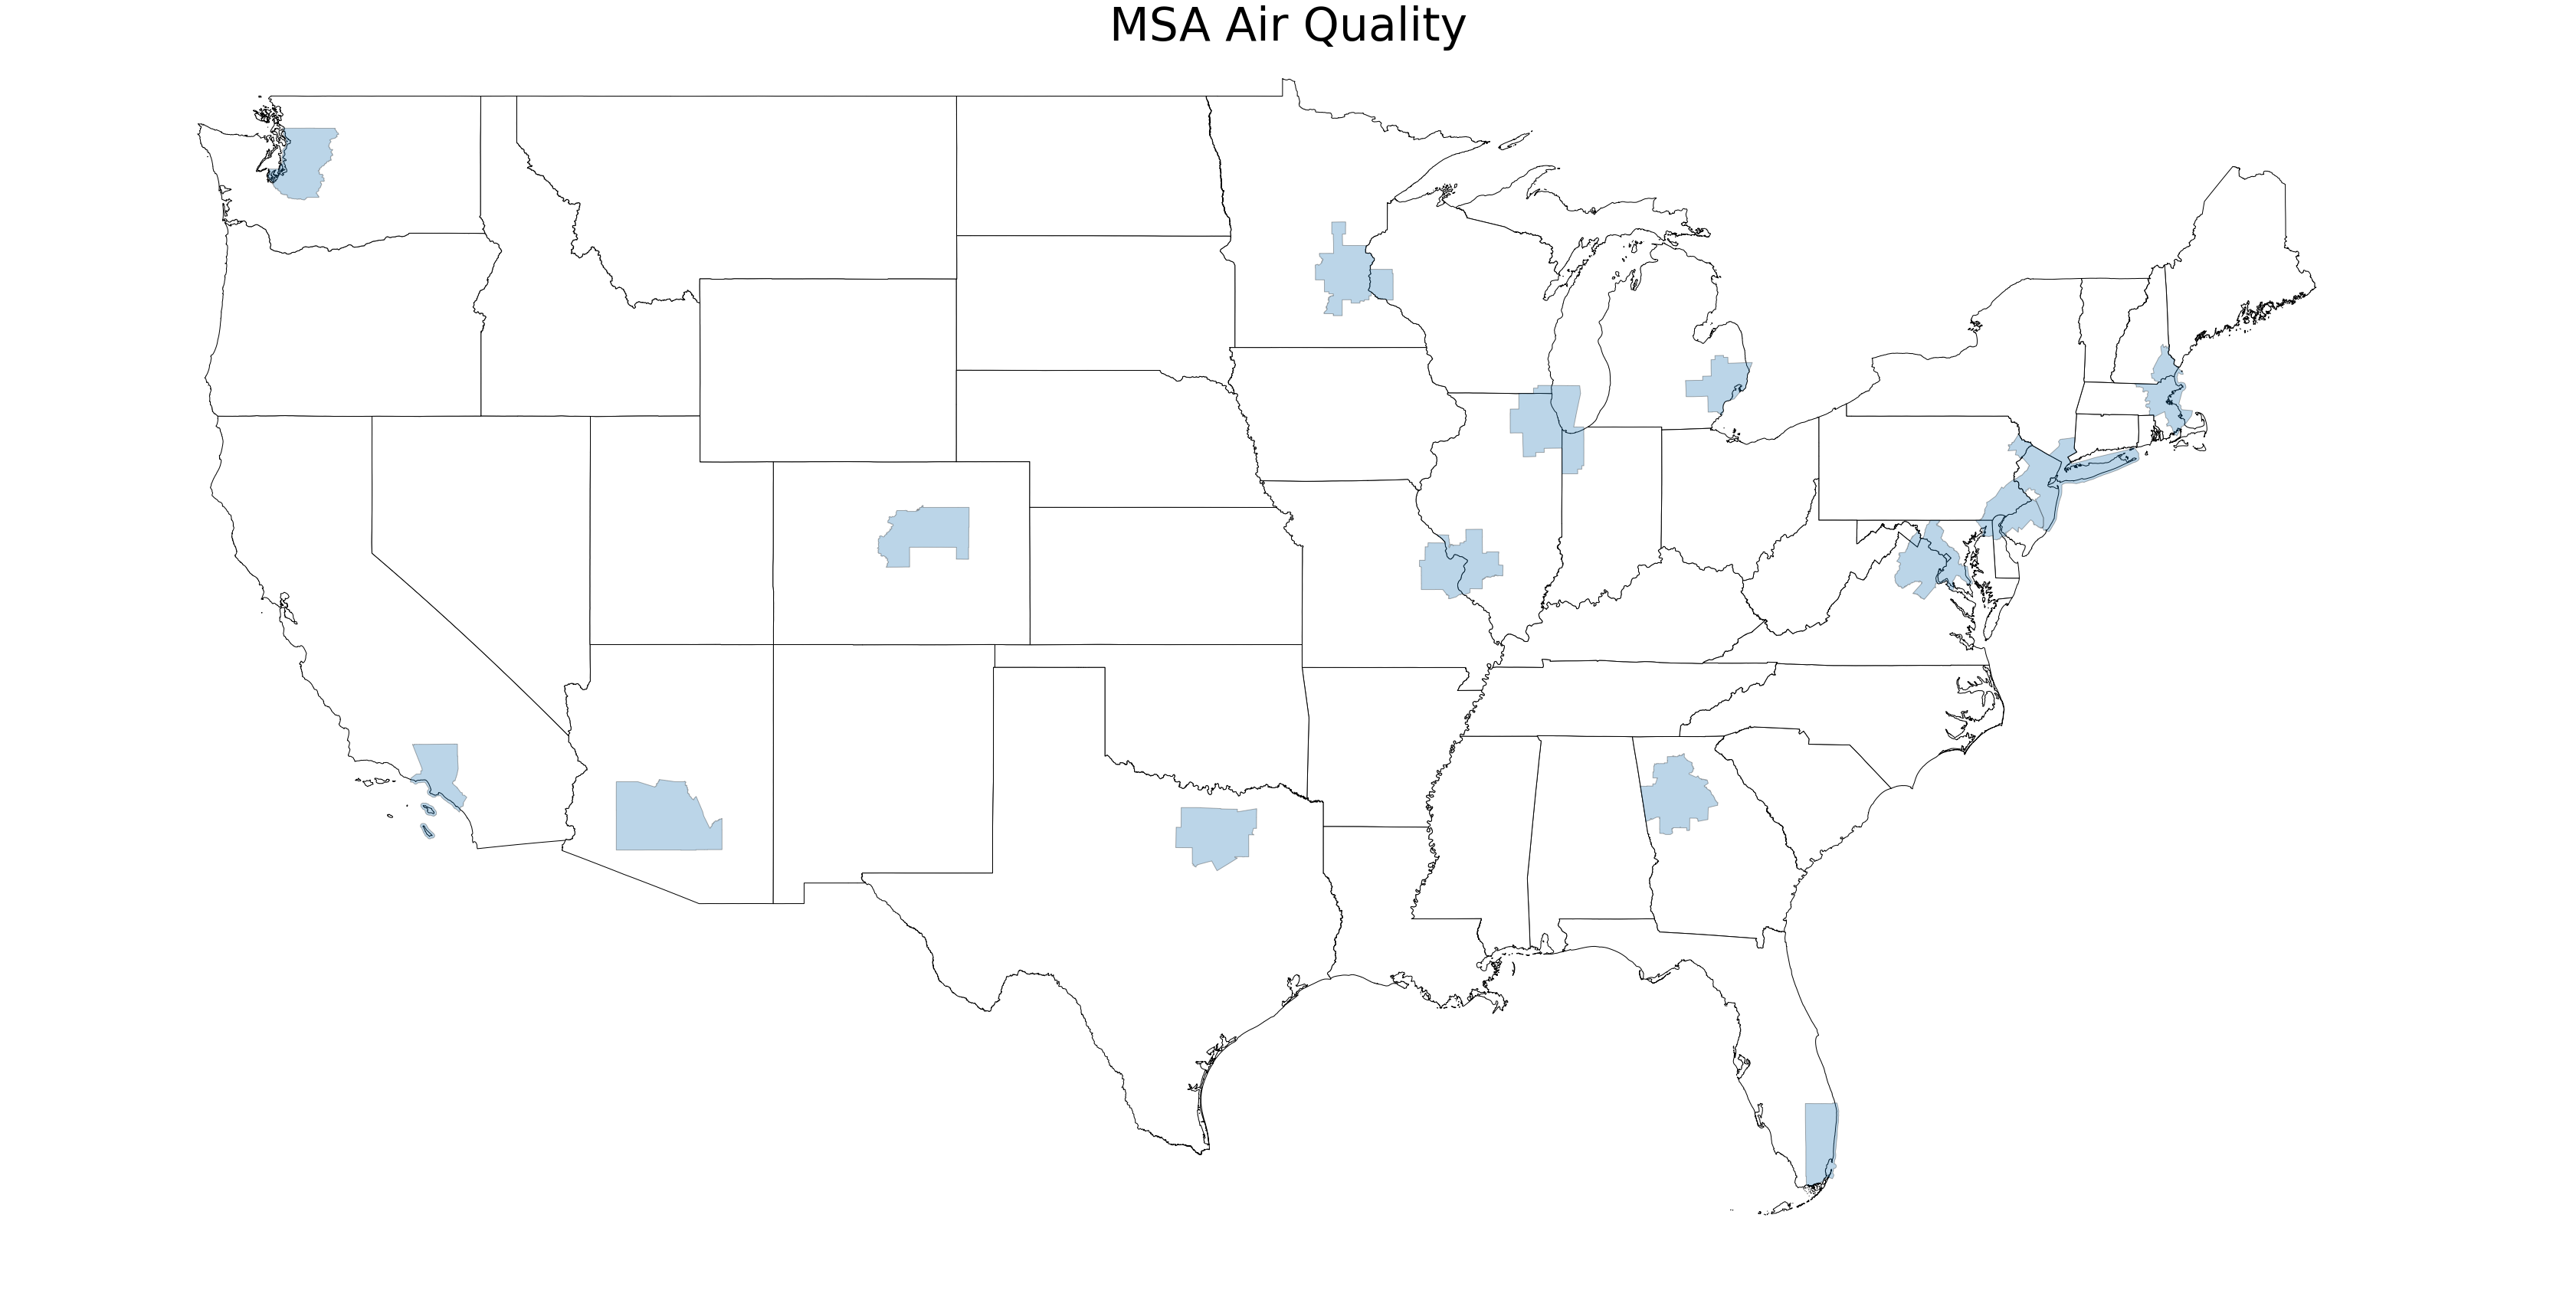

In [14]:
msa = geopandas.read_file('/Users/smaslam/Desktop/airpollution/airpollution/CBSAMap/tl_2019_us_cbsa.shp')
msa = msa_drop(msa)
us = geopandas.read_file('/Users/smaslam/Desktop/airpollution/airpollution/US/cb_2016_us_state_500k.shp')
base = us.plot(color='white', edgecolor='black', figsize=(60, 40))
ax = msa.plot(ax=base, alpha=0.3, edgecolor='k')

ax.set_ylim([23, 50])
ax.set_xlim([-130,-60])
ax.set_title('MSA Air Quality', fontsize = 60)
ax.set_axis_off()

